In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import pickle


from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from src.models import TESTVAE
 
from src.common.helperfunctions import *
from src.common.accuracy_XGboost import *


import xgboost as xgb
import time
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = 'data/raw/creditcard.csv'
df = pd.read_csv(file_name)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [4]:
mxs = MinMaxScaler()
train.iloc[:,:] = mxs.fit_transform(train.iloc[:,:].values)
test.iloc[:,:] = mxs.transform(test.iloc[:,:].values)

/home/chinne/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/chinne/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
train_Class = train[train.Class == 1]

In [6]:
label_col = []
feature_cols = []
label_col = [i for i in train.columns if 'Class' in i]
feature_cols = [i for i in train.columns if i not in label_col]

In [7]:
train_Class.drop('Class', axis = 1,inplace=True)
# train_Class.drop('Time', axis = 1,inplace=True)

/home/chinne/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
dataloader = prepareDataset(train_Class, batch_size = 64, device = 'cpu', withLabel = False)

In [9]:
dataloader.dataset.features.size(1)

30

Starting Training Loop...
394 394
epoch: 0, Accuracy: 1.0


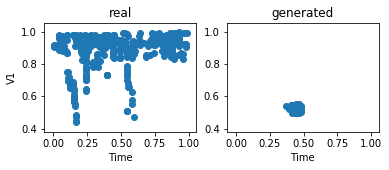

====> Epoch: 0 Average loss: 20.9250
====> Epoch: 1 Average loss: 20.8185
====> Epoch: 2 Average loss: 20.7011
====> Epoch: 3 Average loss: 20.5887
====> Epoch: 4 Average loss: 20.4442
====> Epoch: 5 Average loss: 20.3095
====> Epoch: 6 Average loss: 20.1401
====> Epoch: 7 Average loss: 19.9548
====> Epoch: 8 Average loss: 19.7856
====> Epoch: 9 Average loss: 19.5955
394 394
epoch: 10, Accuracy: 0.9923857868020305


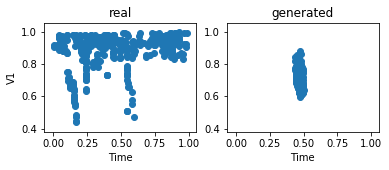

====> Epoch: 10 Average loss: 19.4327
====> Epoch: 11 Average loss: 19.3385
====> Epoch: 12 Average loss: 19.2960
====> Epoch: 13 Average loss: 19.2825
====> Epoch: 14 Average loss: 19.2553
====> Epoch: 15 Average loss: 19.2441
====> Epoch: 16 Average loss: 19.1346
====> Epoch: 17 Average loss: 19.1041
====> Epoch: 18 Average loss: 18.9611
====> Epoch: 19 Average loss: 18.8987
394 394
epoch: 20, Accuracy: 0.9974619289340102


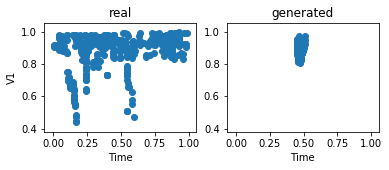

====> Epoch: 20 Average loss: 18.8542
====> Epoch: 21 Average loss: 18.8115
====> Epoch: 22 Average loss: 18.8137
====> Epoch: 23 Average loss: 18.8203
====> Epoch: 24 Average loss: 18.8179
====> Epoch: 25 Average loss: 18.8292
====> Epoch: 26 Average loss: 18.8290
====> Epoch: 27 Average loss: 18.8380
====> Epoch: 28 Average loss: 18.8475
====> Epoch: 29 Average loss: 18.8518
394 394
epoch: 30, Accuracy: 1.0


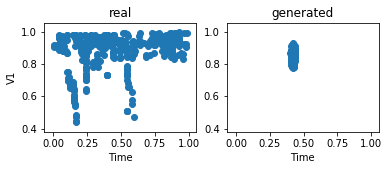

====> Epoch: 30 Average loss: 18.8411
====> Epoch: 31 Average loss: 18.8409
====> Epoch: 32 Average loss: 18.8252
====> Epoch: 33 Average loss: 18.7979
====> Epoch: 34 Average loss: 18.7885
====> Epoch: 35 Average loss: 18.7692
====> Epoch: 36 Average loss: 18.7631
====> Epoch: 37 Average loss: 18.7271
====> Epoch: 38 Average loss: 18.7126
====> Epoch: 39 Average loss: 18.7025
394 394
epoch: 40, Accuracy: 1.0


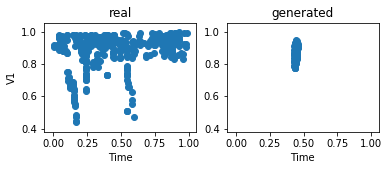

====> Epoch: 40 Average loss: 18.6939
====> Epoch: 41 Average loss: 18.6982
====> Epoch: 42 Average loss: 18.6885
====> Epoch: 43 Average loss: 18.6854
====> Epoch: 44 Average loss: 18.6715
====> Epoch: 45 Average loss: 18.6652
====> Epoch: 46 Average loss: 18.6569
====> Epoch: 47 Average loss: 18.6450
====> Epoch: 48 Average loss: 18.6357
====> Epoch: 49 Average loss: 18.6261
394 394
epoch: 50, Accuracy: 0.9949238578680203


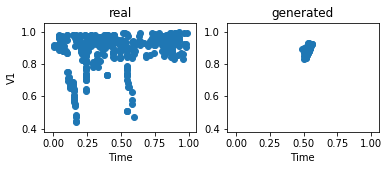

====> Epoch: 50 Average loss: 18.6158
====> Epoch: 51 Average loss: 18.6028
====> Epoch: 52 Average loss: 18.5974
====> Epoch: 53 Average loss: 18.5926
====> Epoch: 54 Average loss: 18.5911
====> Epoch: 55 Average loss: 18.5825
====> Epoch: 56 Average loss: 18.5804
====> Epoch: 57 Average loss: 18.5763
====> Epoch: 58 Average loss: 18.5776
====> Epoch: 59 Average loss: 18.5766
394 394
epoch: 60, Accuracy: 0.9974619289340102


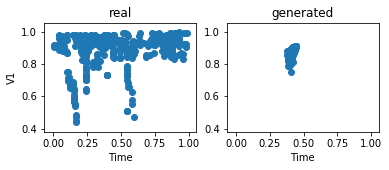

====> Epoch: 60 Average loss: 18.5834
====> Epoch: 61 Average loss: 18.5904
====> Epoch: 62 Average loss: 18.5974
====> Epoch: 63 Average loss: 18.5987
====> Epoch: 64 Average loss: 18.6125
====> Epoch: 65 Average loss: 18.6135
====> Epoch: 66 Average loss: 18.6059
====> Epoch: 67 Average loss: 18.5986
====> Epoch: 68 Average loss: 18.6030
====> Epoch: 69 Average loss: 18.5967
394 394
epoch: 70, Accuracy: 0.9974619289340102


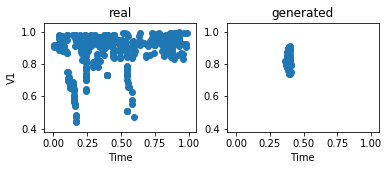

====> Epoch: 70 Average loss: 18.5952
====> Epoch: 71 Average loss: 18.5894
====> Epoch: 72 Average loss: 18.5804
====> Epoch: 73 Average loss: 18.5765
====> Epoch: 74 Average loss: 18.5643
====> Epoch: 75 Average loss: 18.5555
====> Epoch: 76 Average loss: 18.5478
====> Epoch: 77 Average loss: 18.5375
====> Epoch: 78 Average loss: 18.5271
====> Epoch: 79 Average loss: 18.5241
394 394
epoch: 80, Accuracy: 0.9974619289340102


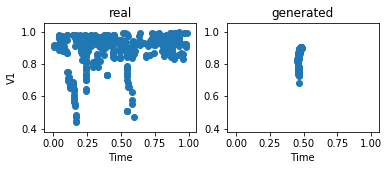

====> Epoch: 80 Average loss: 18.5128
====> Epoch: 81 Average loss: 18.5241
====> Epoch: 82 Average loss: 18.5206
====> Epoch: 83 Average loss: 18.5231
====> Epoch: 84 Average loss: 18.5347
====> Epoch: 85 Average loss: 18.5392
====> Epoch: 86 Average loss: 18.5547
====> Epoch: 87 Average loss: 18.5545
====> Epoch: 88 Average loss: 18.5539
====> Epoch: 89 Average loss: 18.5566
394 394
epoch: 90, Accuracy: 1.0


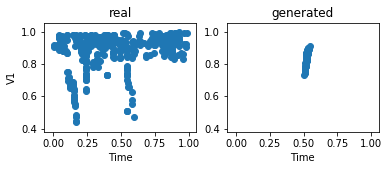

====> Epoch: 90 Average loss: 18.5663
====> Epoch: 91 Average loss: 18.5626
====> Epoch: 92 Average loss: 18.5672
====> Epoch: 93 Average loss: 18.5676
====> Epoch: 94 Average loss: 18.5739
====> Epoch: 95 Average loss: 18.5788
====> Epoch: 96 Average loss: 18.5763
====> Epoch: 97 Average loss: 18.5806
====> Epoch: 98 Average loss: 18.5829
====> Epoch: 99 Average loss: 18.5806
394 394
epoch: 100, Accuracy: 1.0


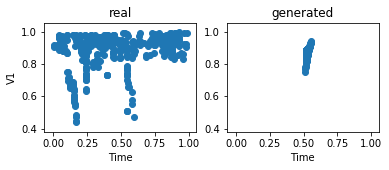

====> Epoch: 100 Average loss: 18.5708
====> Epoch: 101 Average loss: 18.5573
====> Epoch: 102 Average loss: 18.5434
====> Epoch: 103 Average loss: 18.5292
====> Epoch: 104 Average loss: 18.5204
====> Epoch: 105 Average loss: 18.5020
====> Epoch: 106 Average loss: 18.4941
====> Epoch: 107 Average loss: 18.4867
====> Epoch: 108 Average loss: 18.4907
====> Epoch: 109 Average loss: 18.4865
394 394
epoch: 110, Accuracy: 0.9949238578680203


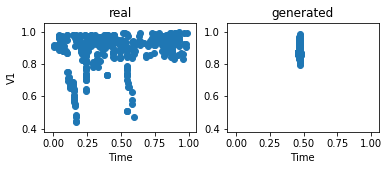

====> Epoch: 110 Average loss: 18.4939
====> Epoch: 111 Average loss: 18.4916
====> Epoch: 112 Average loss: 18.4997
====> Epoch: 113 Average loss: 18.4982
====> Epoch: 114 Average loss: 18.5048
====> Epoch: 115 Average loss: 18.5138
====> Epoch: 116 Average loss: 18.5108
====> Epoch: 117 Average loss: 18.5119
====> Epoch: 118 Average loss: 18.5159
====> Epoch: 119 Average loss: 18.5125
394 394
epoch: 120, Accuracy: 0.9873096446700508


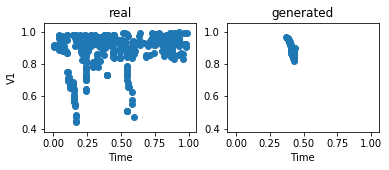

====> Epoch: 120 Average loss: 18.5102
====> Epoch: 121 Average loss: 18.5065
====> Epoch: 122 Average loss: 18.5064
====> Epoch: 123 Average loss: 18.5079
====> Epoch: 124 Average loss: 18.5016
====> Epoch: 125 Average loss: 18.4988
====> Epoch: 126 Average loss: 18.5039
====> Epoch: 127 Average loss: 18.4986
====> Epoch: 128 Average loss: 18.4890
====> Epoch: 129 Average loss: 18.4930
394 394
epoch: 130, Accuracy: 0.9898477157360406


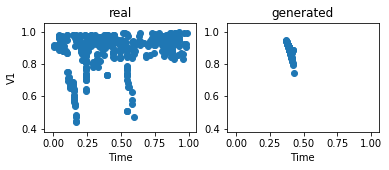

====> Epoch: 130 Average loss: 18.4927
====> Epoch: 131 Average loss: 18.4837
====> Epoch: 132 Average loss: 18.4867
====> Epoch: 133 Average loss: 18.4876
====> Epoch: 134 Average loss: 18.4817
====> Epoch: 135 Average loss: 18.4901
====> Epoch: 136 Average loss: 18.4840
====> Epoch: 137 Average loss: 18.4795
====> Epoch: 138 Average loss: 18.4769
====> Epoch: 139 Average loss: 18.4894
394 394
epoch: 140, Accuracy: 0.9949238578680203


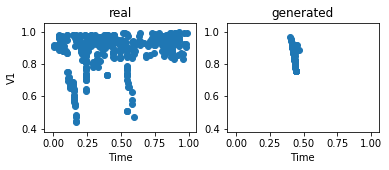

====> Epoch: 140 Average loss: 18.4854
====> Epoch: 141 Average loss: 18.4804
====> Epoch: 142 Average loss: 18.4798
====> Epoch: 143 Average loss: 18.4821
====> Epoch: 144 Average loss: 18.4805
====> Epoch: 145 Average loss: 18.4812
====> Epoch: 146 Average loss: 18.4797
====> Epoch: 147 Average loss: 18.4747
====> Epoch: 148 Average loss: 18.4811
====> Epoch: 149 Average loss: 18.4800
394 394
epoch: 150, Accuracy: 0.9949238578680203


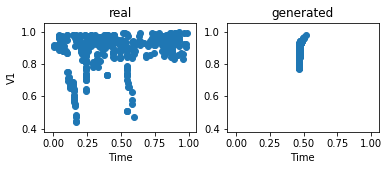

====> Epoch: 150 Average loss: 18.4827
====> Epoch: 151 Average loss: 18.4805
====> Epoch: 152 Average loss: 18.4854
====> Epoch: 153 Average loss: 18.4809
====> Epoch: 154 Average loss: 18.4872
====> Epoch: 155 Average loss: 18.4872
====> Epoch: 156 Average loss: 18.4799
====> Epoch: 157 Average loss: 18.4881
====> Epoch: 158 Average loss: 18.4873
====> Epoch: 159 Average loss: 18.4862
394 394
epoch: 160, Accuracy: 0.9949238578680203


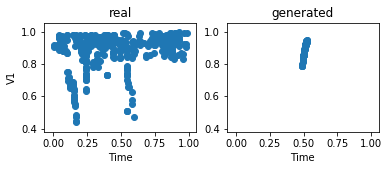

====> Epoch: 160 Average loss: 18.4838
====> Epoch: 161 Average loss: 18.4912
====> Epoch: 162 Average loss: 18.4920
====> Epoch: 163 Average loss: 18.4852
====> Epoch: 164 Average loss: 18.4968
====> Epoch: 165 Average loss: 18.4865
====> Epoch: 166 Average loss: 18.4854
====> Epoch: 167 Average loss: 18.4910
====> Epoch: 168 Average loss: 18.4919
====> Epoch: 169 Average loss: 18.4950
394 394
epoch: 170, Accuracy: 0.9365482233502538


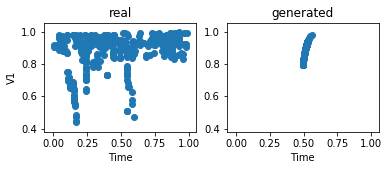

====> Epoch: 170 Average loss: 18.5018
====> Epoch: 171 Average loss: 18.4907
====> Epoch: 172 Average loss: 18.4953
====> Epoch: 173 Average loss: 18.4884
====> Epoch: 174 Average loss: 18.5016
====> Epoch: 175 Average loss: 18.4754
====> Epoch: 176 Average loss: 18.4965
====> Epoch: 177 Average loss: 18.5014
====> Epoch: 178 Average loss: 18.4911
====> Epoch: 179 Average loss: 18.4964
394 394
epoch: 180, Accuracy: 0.9746192893401016


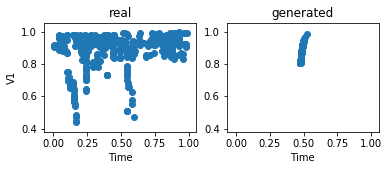

====> Epoch: 180 Average loss: 18.4938
====> Epoch: 181 Average loss: 18.4979
====> Epoch: 182 Average loss: 18.5016
====> Epoch: 183 Average loss: 18.4884
====> Epoch: 184 Average loss: 18.4828
====> Epoch: 185 Average loss: 18.4879
====> Epoch: 186 Average loss: 18.4898
====> Epoch: 187 Average loss: 18.4788
====> Epoch: 188 Average loss: 18.4674
====> Epoch: 189 Average loss: 18.4671
394 394
epoch: 190, Accuracy: 0.9898477157360406


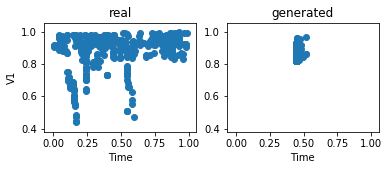

====> Epoch: 190 Average loss: 18.4736
====> Epoch: 191 Average loss: 18.4743
====> Epoch: 192 Average loss: 18.4701
====> Epoch: 193 Average loss: 18.4677
====> Epoch: 194 Average loss: 18.4703
====> Epoch: 195 Average loss: 18.4698
====> Epoch: 196 Average loss: 18.4664
====> Epoch: 197 Average loss: 18.4714
====> Epoch: 198 Average loss: 18.4731
====> Epoch: 199 Average loss: 18.4738
394 394
epoch: 200, Accuracy: 0.9923857868020305


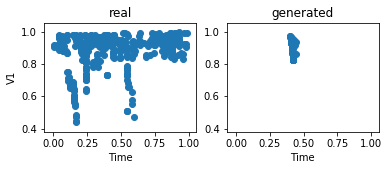

====> Epoch: 200 Average loss: 18.4768
====> Epoch: 201 Average loss: 18.4792
====> Epoch: 202 Average loss: 18.4837
====> Epoch: 203 Average loss: 18.4870
====> Epoch: 204 Average loss: 18.4839
====> Epoch: 205 Average loss: 18.4959
====> Epoch: 206 Average loss: 18.4937
====> Epoch: 207 Average loss: 18.4994
====> Epoch: 208 Average loss: 18.4805
====> Epoch: 209 Average loss: 18.4894
394 394
epoch: 210, Accuracy: 0.9974619289340102


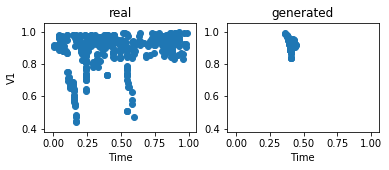

====> Epoch: 210 Average loss: 18.4846
====> Epoch: 211 Average loss: 18.4827
====> Epoch: 212 Average loss: 18.4809
====> Epoch: 213 Average loss: 18.4816
====> Epoch: 214 Average loss: 18.4829
====> Epoch: 215 Average loss: 18.4623
====> Epoch: 216 Average loss: 18.4597
====> Epoch: 217 Average loss: 18.4696
====> Epoch: 218 Average loss: 18.4613
====> Epoch: 219 Average loss: 18.4617
394 394
epoch: 220, Accuracy: 0.9923857868020305


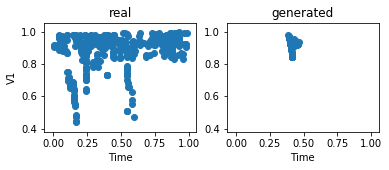

====> Epoch: 220 Average loss: 18.4489
====> Epoch: 221 Average loss: 18.4547
====> Epoch: 222 Average loss: 18.4491
====> Epoch: 223 Average loss: 18.4545
====> Epoch: 224 Average loss: 18.4472
====> Epoch: 225 Average loss: 18.4473
====> Epoch: 226 Average loss: 18.4529
====> Epoch: 227 Average loss: 18.4478
====> Epoch: 228 Average loss: 18.4631
====> Epoch: 229 Average loss: 18.4669
394 394
epoch: 230, Accuracy: 0.9949238578680203


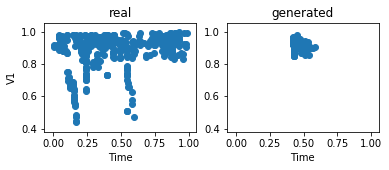

====> Epoch: 230 Average loss: 18.4774
====> Epoch: 231 Average loss: 18.4725
====> Epoch: 232 Average loss: 18.4684
====> Epoch: 233 Average loss: 18.4594
====> Epoch: 234 Average loss: 18.4525
====> Epoch: 235 Average loss: 18.4485
====> Epoch: 236 Average loss: 18.4472
====> Epoch: 237 Average loss: 18.4415
====> Epoch: 238 Average loss: 18.4509
====> Epoch: 239 Average loss: 18.4446
394 394
epoch: 240, Accuracy: 1.0


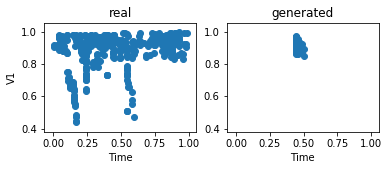

====> Epoch: 240 Average loss: 18.4495
====> Epoch: 241 Average loss: 18.4504
====> Epoch: 242 Average loss: 18.4482
====> Epoch: 243 Average loss: 18.4501
====> Epoch: 244 Average loss: 18.4528
====> Epoch: 245 Average loss: 18.4588
====> Epoch: 246 Average loss: 18.4428
====> Epoch: 247 Average loss: 18.4528
====> Epoch: 248 Average loss: 18.4531
====> Epoch: 249 Average loss: 18.4562
394 394
epoch: 250, Accuracy: 0.9974619289340102


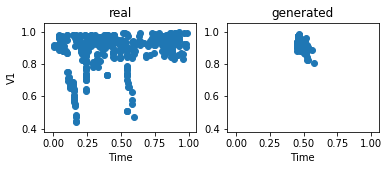

====> Epoch: 250 Average loss: 18.4436
====> Epoch: 251 Average loss: 18.4429
====> Epoch: 252 Average loss: 18.4319
====> Epoch: 253 Average loss: 18.4355
====> Epoch: 254 Average loss: 18.4356
====> Epoch: 255 Average loss: 18.4367
====> Epoch: 256 Average loss: 18.4402
====> Epoch: 257 Average loss: 18.4405
====> Epoch: 258 Average loss: 18.4422
====> Epoch: 259 Average loss: 18.4458
394 394
epoch: 260, Accuracy: 0.9873096446700508


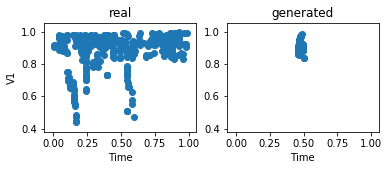

====> Epoch: 260 Average loss: 18.4540
====> Epoch: 261 Average loss: 18.4545
====> Epoch: 262 Average loss: 18.4432
====> Epoch: 263 Average loss: 18.4410
====> Epoch: 264 Average loss: 18.4455
====> Epoch: 265 Average loss: 18.4386
====> Epoch: 266 Average loss: 18.4417
====> Epoch: 267 Average loss: 18.4340
====> Epoch: 268 Average loss: 18.4341
====> Epoch: 269 Average loss: 18.4317
394 394
epoch: 270, Accuracy: 0.9949238578680203


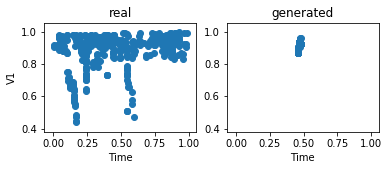

====> Epoch: 270 Average loss: 18.4201
====> Epoch: 271 Average loss: 18.4242
====> Epoch: 272 Average loss: 18.4240
====> Epoch: 273 Average loss: 18.4185
====> Epoch: 274 Average loss: 18.4186
====> Epoch: 275 Average loss: 18.4273
====> Epoch: 276 Average loss: 18.4274
====> Epoch: 277 Average loss: 18.4114
====> Epoch: 278 Average loss: 18.4192
====> Epoch: 279 Average loss: 18.4222
394 394
epoch: 280, Accuracy: 0.9822335025380711


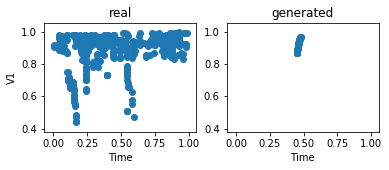

====> Epoch: 280 Average loss: 18.4189
====> Epoch: 281 Average loss: 18.4271
====> Epoch: 282 Average loss: 18.4180
====> Epoch: 283 Average loss: 18.4207
====> Epoch: 284 Average loss: 18.4239
====> Epoch: 285 Average loss: 18.4370
====> Epoch: 286 Average loss: 18.4186
====> Epoch: 287 Average loss: 18.4168
====> Epoch: 288 Average loss: 18.4285
====> Epoch: 289 Average loss: 18.4262
394 394
epoch: 290, Accuracy: 0.9873096446700508


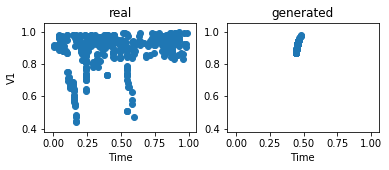

====> Epoch: 290 Average loss: 18.4347
====> Epoch: 291 Average loss: 18.4310
====> Epoch: 292 Average loss: 18.4269
====> Epoch: 293 Average loss: 18.4384
====> Epoch: 294 Average loss: 18.4451
====> Epoch: 295 Average loss: 18.4373
====> Epoch: 296 Average loss: 18.4445
====> Epoch: 297 Average loss: 18.4435
====> Epoch: 298 Average loss: 18.4337
====> Epoch: 299 Average loss: 18.4429
394 394
epoch: 300, Accuracy: 0.9873096446700508


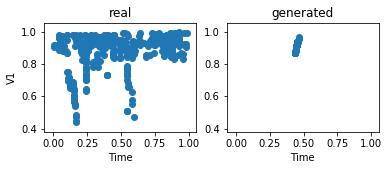

====> Epoch: 300 Average loss: 18.4450
====> Epoch: 301 Average loss: 18.4443
====> Epoch: 302 Average loss: 18.4519
====> Epoch: 303 Average loss: 18.4512
====> Epoch: 304 Average loss: 18.4461
====> Epoch: 305 Average loss: 18.4442
====> Epoch: 306 Average loss: 18.4465
====> Epoch: 307 Average loss: 18.4457
====> Epoch: 308 Average loss: 18.4462
====> Epoch: 309 Average loss: 18.4527
394 394
epoch: 310, Accuracy: 0.9822335025380711


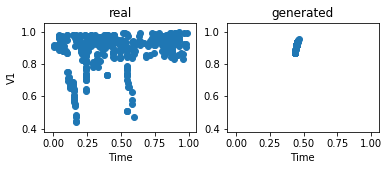

====> Epoch: 310 Average loss: 18.4438
====> Epoch: 311 Average loss: 18.4421
====> Epoch: 312 Average loss: 18.4473
====> Epoch: 313 Average loss: 18.4362
====> Epoch: 314 Average loss: 18.4272
====> Epoch: 315 Average loss: 18.4395
====> Epoch: 316 Average loss: 18.4297
====> Epoch: 317 Average loss: 18.4419
====> Epoch: 318 Average loss: 18.4435
====> Epoch: 319 Average loss: 18.4290
394 394
epoch: 320, Accuracy: 0.9923857868020305


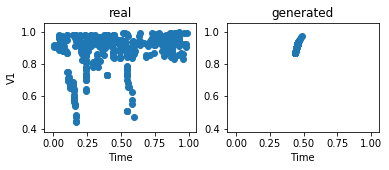

====> Epoch: 320 Average loss: 18.4291
====> Epoch: 321 Average loss: 18.4229
====> Epoch: 322 Average loss: 18.4256
====> Epoch: 323 Average loss: 18.4276
====> Epoch: 324 Average loss: 18.4239
====> Epoch: 325 Average loss: 18.4267
====> Epoch: 326 Average loss: 18.4279
====> Epoch: 327 Average loss: 18.4270
====> Epoch: 328 Average loss: 18.4252
====> Epoch: 329 Average loss: 18.4189
394 394
epoch: 330, Accuracy: 0.9923857868020305


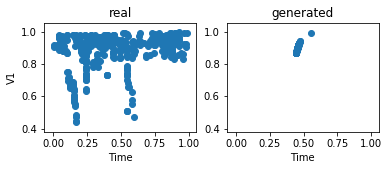

====> Epoch: 330 Average loss: 18.4340
====> Epoch: 331 Average loss: 18.4311
====> Epoch: 332 Average loss: 18.4414
====> Epoch: 333 Average loss: 18.4226
====> Epoch: 334 Average loss: 18.4290
====> Epoch: 335 Average loss: 18.4387
====> Epoch: 336 Average loss: 18.4312
====> Epoch: 337 Average loss: 18.4575
====> Epoch: 338 Average loss: 18.4343
====> Epoch: 339 Average loss: 18.4368
394 394
epoch: 340, Accuracy: 0.9949238578680203


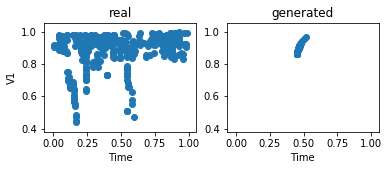

====> Epoch: 340 Average loss: 18.4368
====> Epoch: 341 Average loss: 18.4446
====> Epoch: 342 Average loss: 18.4277
====> Epoch: 343 Average loss: 18.4306
====> Epoch: 344 Average loss: 18.4549
====> Epoch: 345 Average loss: 18.4306
====> Epoch: 346 Average loss: 18.4369
====> Epoch: 347 Average loss: 18.4289
====> Epoch: 348 Average loss: 18.4248
====> Epoch: 349 Average loss: 18.4533
394 394
epoch: 350, Accuracy: 0.9974619289340102


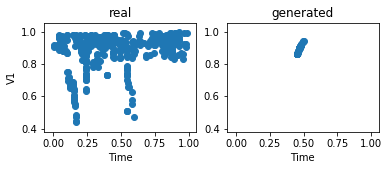

====> Epoch: 350 Average loss: 18.4232
====> Epoch: 351 Average loss: 18.4238
====> Epoch: 352 Average loss: 18.4176
====> Epoch: 353 Average loss: 18.4300
====> Epoch: 354 Average loss: 18.4283
====> Epoch: 355 Average loss: 18.4104
====> Epoch: 356 Average loss: 18.4048
====> Epoch: 357 Average loss: 18.4055
====> Epoch: 358 Average loss: 18.4113
====> Epoch: 359 Average loss: 18.4015
394 394
epoch: 360, Accuracy: 0.9923857868020305


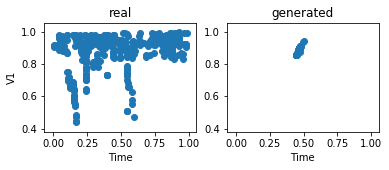

====> Epoch: 360 Average loss: 18.4024
====> Epoch: 361 Average loss: 18.3995
====> Epoch: 362 Average loss: 18.3999
====> Epoch: 363 Average loss: 18.3978
====> Epoch: 364 Average loss: 18.4003
====> Epoch: 365 Average loss: 18.4128
====> Epoch: 366 Average loss: 18.4009
====> Epoch: 367 Average loss: 18.4000
====> Epoch: 368 Average loss: 18.4000
====> Epoch: 369 Average loss: 18.4024
394 394
epoch: 370, Accuracy: 1.0


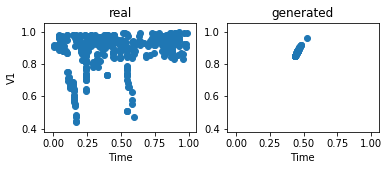

====> Epoch: 370 Average loss: 18.4112
====> Epoch: 371 Average loss: 18.4088
====> Epoch: 372 Average loss: 18.4054
====> Epoch: 373 Average loss: 18.4057
====> Epoch: 374 Average loss: 18.4054
====> Epoch: 375 Average loss: 18.4069
====> Epoch: 376 Average loss: 18.4096
====> Epoch: 377 Average loss: 18.4144
====> Epoch: 378 Average loss: 18.4109
====> Epoch: 379 Average loss: 18.4146
394 394
epoch: 380, Accuracy: 0.9822335025380711


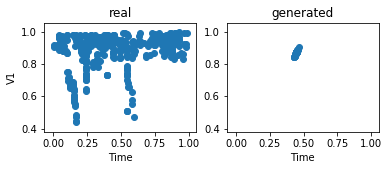

====> Epoch: 380 Average loss: 18.4126
====> Epoch: 381 Average loss: 18.4190
====> Epoch: 382 Average loss: 18.4183
====> Epoch: 383 Average loss: 18.4251
====> Epoch: 384 Average loss: 18.4189
====> Epoch: 385 Average loss: 18.4308
====> Epoch: 386 Average loss: 18.4227
====> Epoch: 387 Average loss: 18.4252
====> Epoch: 388 Average loss: 18.4270
====> Epoch: 389 Average loss: 18.4277
394 394
epoch: 390, Accuracy: 0.9949238578680203


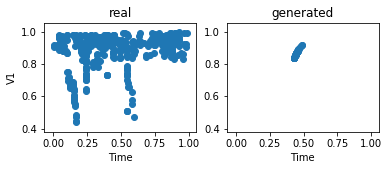

====> Epoch: 390 Average loss: 18.4368
====> Epoch: 391 Average loss: 18.4296
====> Epoch: 392 Average loss: 18.4239
====> Epoch: 393 Average loss: 18.4237
====> Epoch: 394 Average loss: 18.4194
====> Epoch: 395 Average loss: 18.4177
====> Epoch: 396 Average loss: 18.4159
====> Epoch: 397 Average loss: 18.4110
====> Epoch: 398 Average loss: 18.4105
====> Epoch: 399 Average loss: 18.4072
394 394
epoch: 400, Accuracy: 0.9923857868020305


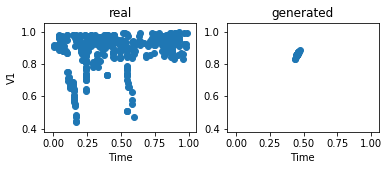

====> Epoch: 400 Average loss: 18.4063
====> Epoch: 401 Average loss: 18.4034
====> Epoch: 402 Average loss: 18.4053
====> Epoch: 403 Average loss: 18.4095
====> Epoch: 404 Average loss: 18.4033
====> Epoch: 405 Average loss: 18.4067
====> Epoch: 406 Average loss: 18.4069
====> Epoch: 407 Average loss: 18.4092
====> Epoch: 408 Average loss: 18.4127
====> Epoch: 409 Average loss: 18.4112
394 394
epoch: 410, Accuracy: 0.9898477157360406


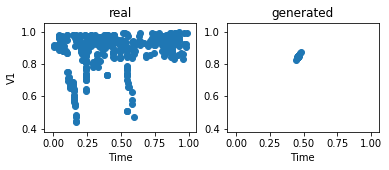

====> Epoch: 410 Average loss: 18.4090
====> Epoch: 411 Average loss: 18.4152
====> Epoch: 412 Average loss: 18.4147
====> Epoch: 413 Average loss: 18.4249
====> Epoch: 414 Average loss: 18.4159
====> Epoch: 415 Average loss: 18.4190
====> Epoch: 416 Average loss: 18.4365
====> Epoch: 417 Average loss: 18.4177
====> Epoch: 418 Average loss: 18.4195
====> Epoch: 419 Average loss: 18.4201
394 394
epoch: 420, Accuracy: 0.9847715736040609


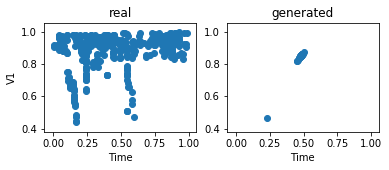

====> Epoch: 420 Average loss: 18.4322
====> Epoch: 421 Average loss: 18.4257
====> Epoch: 422 Average loss: 18.4288
====> Epoch: 423 Average loss: 18.4328
====> Epoch: 424 Average loss: 18.4404
====> Epoch: 425 Average loss: 18.4318
====> Epoch: 426 Average loss: 18.4337
====> Epoch: 427 Average loss: 18.4861
====> Epoch: 428 Average loss: 18.4383
====> Epoch: 429 Average loss: 18.4318
394 394
epoch: 430, Accuracy: 0.9949238578680203


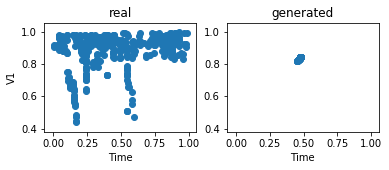

====> Epoch: 430 Average loss: 18.4285
====> Epoch: 431 Average loss: 18.4387
====> Epoch: 432 Average loss: 18.4297
====> Epoch: 433 Average loss: 18.4325
====> Epoch: 434 Average loss: 18.4377
====> Epoch: 435 Average loss: 18.4377
====> Epoch: 436 Average loss: 18.4434
====> Epoch: 437 Average loss: 18.4468
====> Epoch: 438 Average loss: 18.4501
====> Epoch: 439 Average loss: 18.4494
394 394
epoch: 440, Accuracy: 0.9898477157360406


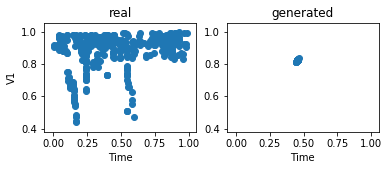

====> Epoch: 440 Average loss: 18.4513
====> Epoch: 441 Average loss: 18.4508
====> Epoch: 442 Average loss: 18.4463
====> Epoch: 443 Average loss: 18.4423
====> Epoch: 444 Average loss: 18.4626
====> Epoch: 445 Average loss: 18.4362
====> Epoch: 446 Average loss: 18.4334
====> Epoch: 447 Average loss: 18.4351
====> Epoch: 448 Average loss: 18.4365
====> Epoch: 449 Average loss: 18.4517
394 394
epoch: 450, Accuracy: 0.9949238578680203


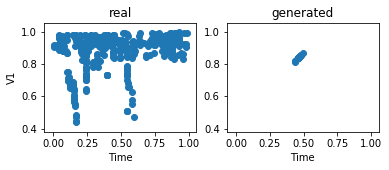

====> Epoch: 450 Average loss: 18.4526
====> Epoch: 451 Average loss: 18.4605
====> Epoch: 452 Average loss: 18.4741
====> Epoch: 453 Average loss: 18.4744
====> Epoch: 454 Average loss: 18.4808
====> Epoch: 455 Average loss: 18.4692
====> Epoch: 456 Average loss: 18.4654
====> Epoch: 457 Average loss: 18.4573
====> Epoch: 458 Average loss: 18.4495
====> Epoch: 459 Average loss: 18.4422
394 394
epoch: 460, Accuracy: 0.9923857868020305


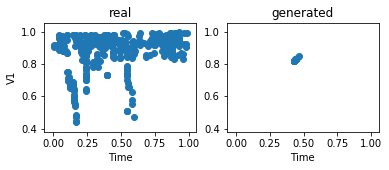

====> Epoch: 460 Average loss: 18.4345
====> Epoch: 461 Average loss: 18.4338
====> Epoch: 462 Average loss: 18.4375
====> Epoch: 463 Average loss: 18.4455
====> Epoch: 464 Average loss: 18.4594
====> Epoch: 465 Average loss: 18.4636
====> Epoch: 466 Average loss: 18.4732
====> Epoch: 467 Average loss: 18.4794
====> Epoch: 468 Average loss: 18.4895
====> Epoch: 469 Average loss: 18.4965
394 394
epoch: 470, Accuracy: 1.0


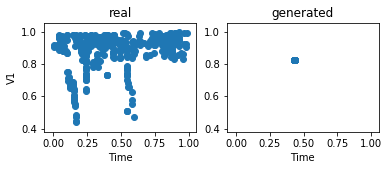

====> Epoch: 470 Average loss: 18.4987
====> Epoch: 471 Average loss: 18.4977
====> Epoch: 472 Average loss: 18.4909
====> Epoch: 473 Average loss: 18.4817
====> Epoch: 474 Average loss: 18.4728
====> Epoch: 475 Average loss: 18.4782
====> Epoch: 476 Average loss: 18.4549
====> Epoch: 477 Average loss: 18.4448
====> Epoch: 478 Average loss: 18.4402
====> Epoch: 479 Average loss: 18.4365
394 394
epoch: 480, Accuracy: 1.0


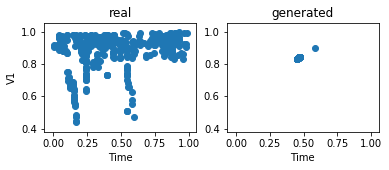

====> Epoch: 480 Average loss: 18.4638
====> Epoch: 481 Average loss: 18.4574
====> Epoch: 482 Average loss: 18.4667
====> Epoch: 483 Average loss: 18.4954
====> Epoch: 484 Average loss: 18.5436
====> Epoch: 485 Average loss: 18.5303
====> Epoch: 486 Average loss: 18.5594
====> Epoch: 487 Average loss: 18.5479
====> Epoch: 488 Average loss: 18.5305
====> Epoch: 489 Average loss: 18.5544
394 394
epoch: 490, Accuracy: 1.0


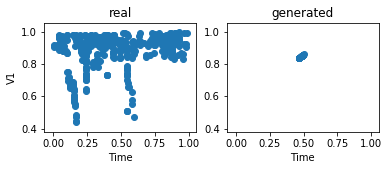

====> Epoch: 490 Average loss: 18.5124
====> Epoch: 491 Average loss: 18.4946
====> Epoch: 492 Average loss: 18.6989
====> Epoch: 493 Average loss: 18.4584
====> Epoch: 494 Average loss: 18.4440
====> Epoch: 495 Average loss: 18.4342
====> Epoch: 496 Average loss: 18.4294
====> Epoch: 497 Average loss: 18.4337
====> Epoch: 498 Average loss: 18.4422
====> Epoch: 499 Average loss: 18.4530
394 394
epoch: 500, Accuracy: 1.0


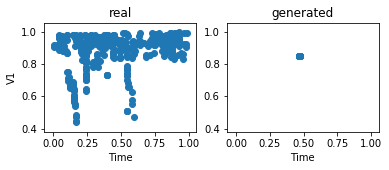

====> Epoch: 500 Average loss: 18.4695
====> Epoch: 501 Average loss: 18.4866
====> Epoch: 502 Average loss: 18.5056
====> Epoch: 503 Average loss: 18.5202
====> Epoch: 504 Average loss: 18.5201
====> Epoch: 505 Average loss: 18.5199
====> Epoch: 506 Average loss: 18.5183
====> Epoch: 507 Average loss: 18.5161
====> Epoch: 508 Average loss: 18.5141
====> Epoch: 509 Average loss: 18.5118
394 394
epoch: 510, Accuracy: 1.0


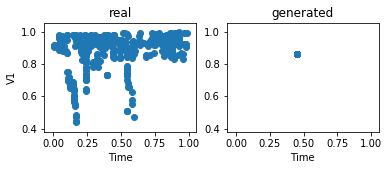

====> Epoch: 510 Average loss: 18.5092
====> Epoch: 511 Average loss: 18.5070
====> Epoch: 512 Average loss: 18.5028
====> Epoch: 513 Average loss: 18.4991
====> Epoch: 514 Average loss: 18.4961
====> Epoch: 515 Average loss: 18.4930
====> Epoch: 516 Average loss: 18.4902
====> Epoch: 517 Average loss: 18.4882
====> Epoch: 518 Average loss: 18.4838
====> Epoch: 519 Average loss: 18.4904
394 394
epoch: 520, Accuracy: 0.9974619289340102


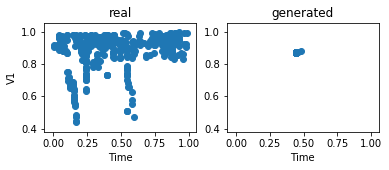

====> Epoch: 520 Average loss: 18.4794
====> Epoch: 521 Average loss: 18.4827
====> Epoch: 522 Average loss: 18.4769
====> Epoch: 523 Average loss: 18.4772
====> Epoch: 524 Average loss: 18.4720
====> Epoch: 525 Average loss: 18.4722
====> Epoch: 526 Average loss: 18.4704
====> Epoch: 527 Average loss: 18.4754
====> Epoch: 528 Average loss: 18.4854
====> Epoch: 529 Average loss: 18.4704
394 394
epoch: 530, Accuracy: 0.649746192893401


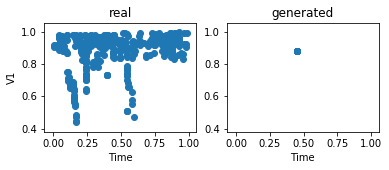

====> Epoch: 530 Average loss: 18.4707
====> Epoch: 531 Average loss: 18.4712
====> Epoch: 532 Average loss: 18.4727
====> Epoch: 533 Average loss: 18.4725
====> Epoch: 534 Average loss: 18.4732
====> Epoch: 535 Average loss: 18.4738
====> Epoch: 536 Average loss: 18.4747
====> Epoch: 537 Average loss: 18.4749
====> Epoch: 538 Average loss: 18.4752
====> Epoch: 539 Average loss: 18.4753
394 394
epoch: 540, Accuracy: 0.9949238578680203


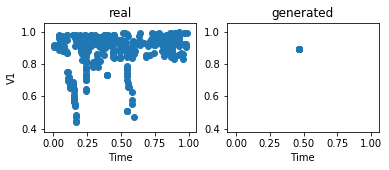

====> Epoch: 540 Average loss: 18.4753
====> Epoch: 541 Average loss: 18.4751
====> Epoch: 542 Average loss: 18.4747
====> Epoch: 543 Average loss: 18.4741
====> Epoch: 544 Average loss: 18.4732
====> Epoch: 545 Average loss: 18.4722
====> Epoch: 546 Average loss: 18.4709
====> Epoch: 547 Average loss: 18.4695
====> Epoch: 548 Average loss: 18.4679
====> Epoch: 549 Average loss: 18.4663
394 394
epoch: 550, Accuracy: 1.0


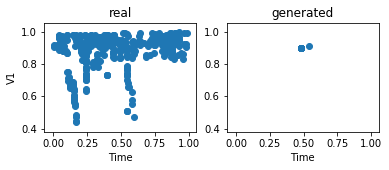

====> Epoch: 550 Average loss: 18.4853
====> Epoch: 551 Average loss: 18.5349
====> Epoch: 552 Average loss: 18.4610
====> Epoch: 553 Average loss: 18.4999
====> Epoch: 554 Average loss: 18.4580
====> Epoch: 555 Average loss: 18.4566
====> Epoch: 556 Average loss: 18.4553
====> Epoch: 557 Average loss: 18.4541
====> Epoch: 558 Average loss: 18.4531
====> Epoch: 559 Average loss: 18.4523
394 394
epoch: 560, Accuracy: 0.9949238578680203


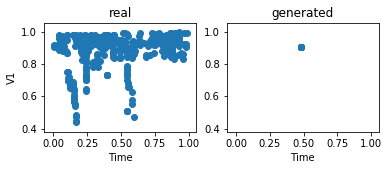

====> Epoch: 560 Average loss: 18.4517
====> Epoch: 561 Average loss: 18.4514
====> Epoch: 562 Average loss: 18.4513
====> Epoch: 563 Average loss: 18.5005
====> Epoch: 564 Average loss: 18.4522
====> Epoch: 565 Average loss: 18.4532
====> Epoch: 566 Average loss: 18.4545
====> Epoch: 567 Average loss: 18.4561
====> Epoch: 568 Average loss: 18.4581
====> Epoch: 569 Average loss: 18.4605
394 394
epoch: 570, Accuracy: 0.9898477157360406


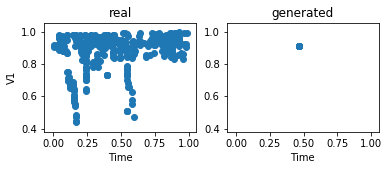

====> Epoch: 570 Average loss: 18.4631
====> Epoch: 571 Average loss: 18.4661
====> Epoch: 572 Average loss: 18.4693
====> Epoch: 573 Average loss: 18.4729
====> Epoch: 574 Average loss: 18.4766
====> Epoch: 575 Average loss: 18.4806
====> Epoch: 576 Average loss: 18.4846
====> Epoch: 577 Average loss: 18.4889
====> Epoch: 578 Average loss: 18.4931
====> Epoch: 579 Average loss: 18.4974
394 394
epoch: 580, Accuracy: 1.0


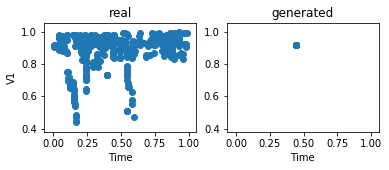

====> Epoch: 580 Average loss: 18.5017
====> Epoch: 581 Average loss: 18.5059
====> Epoch: 582 Average loss: 18.5100
====> Epoch: 583 Average loss: 18.5139
====> Epoch: 584 Average loss: 18.5177
====> Epoch: 585 Average loss: 18.5211
====> Epoch: 586 Average loss: 18.5243
====> Epoch: 587 Average loss: 18.5272
====> Epoch: 588 Average loss: 18.5297
====> Epoch: 589 Average loss: 18.5318
394 394
epoch: 590, Accuracy: 0.9974619289340102


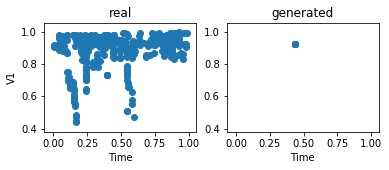

====> Epoch: 590 Average loss: 18.5335
====> Epoch: 591 Average loss: 18.5348
====> Epoch: 592 Average loss: 18.5357
====> Epoch: 593 Average loss: 18.5362
====> Epoch: 594 Average loss: 18.5361
====> Epoch: 595 Average loss: 18.5357
====> Epoch: 596 Average loss: 18.5348
====> Epoch: 597 Average loss: 18.5335
====> Epoch: 598 Average loss: 18.5319
====> Epoch: 599 Average loss: 18.5298
394 394
epoch: 600, Accuracy: 0.6472081218274112


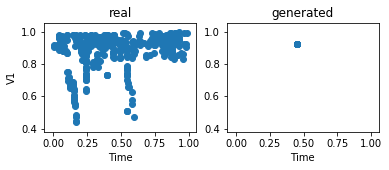

====> Epoch: 600 Average loss: 18.5274
====> Epoch: 601 Average loss: 18.5247
====> Epoch: 602 Average loss: 18.5217
====> Epoch: 603 Average loss: 18.5185
====> Epoch: 604 Average loss: 18.5151
====> Epoch: 605 Average loss: 18.5115
====> Epoch: 606 Average loss: 18.5077
====> Epoch: 607 Average loss: 18.5039
====> Epoch: 608 Average loss: 18.5000
====> Epoch: 609 Average loss: 18.4960
394 394
epoch: 610, Accuracy: 1.0


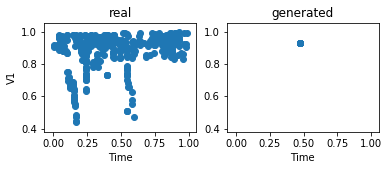

====> Epoch: 610 Average loss: 18.4921
====> Epoch: 611 Average loss: 18.4883
====> Epoch: 612 Average loss: 18.4845
====> Epoch: 613 Average loss: 18.5779
====> Epoch: 614 Average loss: 18.4773
====> Epoch: 615 Average loss: 18.4740
====> Epoch: 616 Average loss: 18.4748
====> Epoch: 617 Average loss: 18.4912
====> Epoch: 618 Average loss: 18.4657
====> Epoch: 619 Average loss: 18.4636
394 394
epoch: 620, Accuracy: 1.0


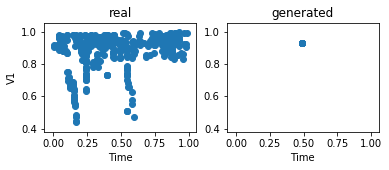

====> Epoch: 620 Average loss: 18.4617
====> Epoch: 621 Average loss: 18.4660
====> Epoch: 622 Average loss: 18.4589
====> Epoch: 623 Average loss: 18.4580
====> Epoch: 624 Average loss: 18.4574
====> Epoch: 625 Average loss: 18.4572
====> Epoch: 626 Average loss: 18.4572
====> Epoch: 627 Average loss: 18.4576
====> Epoch: 628 Average loss: 18.4582
====> Epoch: 629 Average loss: 18.4591
394 394
epoch: 630, Accuracy: 0.649746192893401


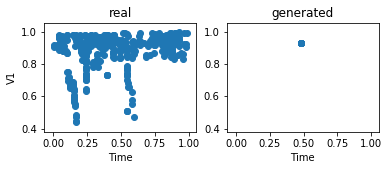

====> Epoch: 630 Average loss: 18.4603
====> Epoch: 631 Average loss: 18.4617
====> Epoch: 632 Average loss: 18.4635
====> Epoch: 633 Average loss: 18.4654
====> Epoch: 634 Average loss: 18.4676
====> Epoch: 635 Average loss: 18.4700
====> Epoch: 636 Average loss: 18.4726
====> Epoch: 637 Average loss: 18.4763
====> Epoch: 638 Average loss: 18.4785
====> Epoch: 639 Average loss: 18.4816
394 394
epoch: 640, Accuracy: 0.8147208121827412


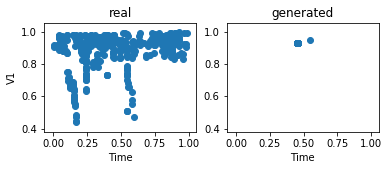

====> Epoch: 640 Average loss: 18.4854
====> Epoch: 641 Average loss: 18.4890
====> Epoch: 642 Average loss: 18.4929
====> Epoch: 643 Average loss: 18.4955
====> Epoch: 644 Average loss: 18.5012
====> Epoch: 645 Average loss: 18.5069
====> Epoch: 646 Average loss: 18.5073
====> Epoch: 647 Average loss: 18.5108
====> Epoch: 648 Average loss: 18.5143
====> Epoch: 649 Average loss: 18.5180
394 394
epoch: 650, Accuracy: 0.9949238578680203


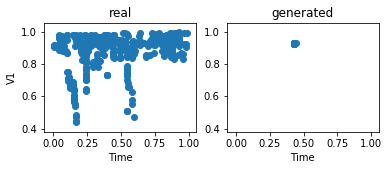

====> Epoch: 650 Average loss: 18.5218
====> Epoch: 651 Average loss: 18.5252
====> Epoch: 652 Average loss: 18.5286
====> Epoch: 653 Average loss: 18.5319
====> Epoch: 654 Average loss: 18.5350
====> Epoch: 655 Average loss: 18.5378
====> Epoch: 656 Average loss: 18.5405
====> Epoch: 657 Average loss: 18.5428
====> Epoch: 658 Average loss: 18.5449
====> Epoch: 659 Average loss: 18.5467
394 394
epoch: 660, Accuracy: 1.0


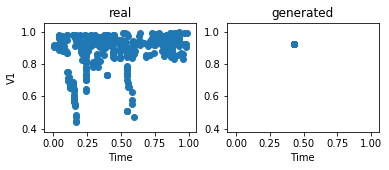

====> Epoch: 660 Average loss: 18.5481
====> Epoch: 661 Average loss: 18.5492
====> Epoch: 662 Average loss: 18.5500
====> Epoch: 663 Average loss: 18.5504
====> Epoch: 664 Average loss: 18.5492
====> Epoch: 665 Average loss: 18.5325
====> Epoch: 666 Average loss: 18.4959
====> Epoch: 667 Average loss: 18.4649
====> Epoch: 668 Average loss: 18.4845
====> Epoch: 669 Average loss: 18.4773
394 394
epoch: 670, Accuracy: 1.0


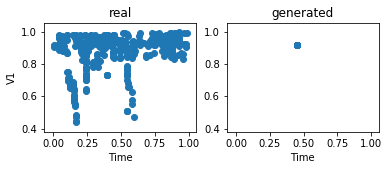

====> Epoch: 670 Average loss: 18.4241
====> Epoch: 671 Average loss: 18.4205
====> Epoch: 672 Average loss: 18.4551
====> Epoch: 673 Average loss: 18.4939
====> Epoch: 674 Average loss: 18.5176
====> Epoch: 675 Average loss: 18.5197
====> Epoch: 676 Average loss: 18.5102
====> Epoch: 677 Average loss: 18.4988
====> Epoch: 678 Average loss: 18.4883
====> Epoch: 679 Average loss: 18.4798
394 394
epoch: 680, Accuracy: 1.0


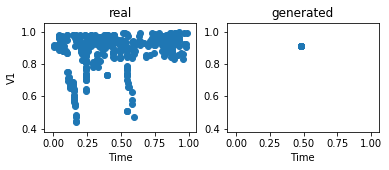

====> Epoch: 680 Average loss: 18.4739
====> Epoch: 681 Average loss: 18.4710
====> Epoch: 682 Average loss: 18.4711
====> Epoch: 683 Average loss: 18.4739
====> Epoch: 684 Average loss: 18.4789
====> Epoch: 685 Average loss: 18.4851
====> Epoch: 686 Average loss: 18.4914
====> Epoch: 687 Average loss: 18.4963
====> Epoch: 688 Average loss: 18.4983
====> Epoch: 689 Average loss: 18.4963
394 394
epoch: 690, Accuracy: 1.0


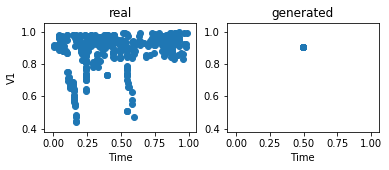

====> Epoch: 690 Average loss: 18.4893
====> Epoch: 691 Average loss: 18.4776
====> Epoch: 692 Average loss: 18.4626
====> Epoch: 693 Average loss: 18.4464
====> Epoch: 694 Average loss: 18.4358
====> Epoch: 695 Average loss: 18.4188
====> Epoch: 696 Average loss: 18.4116
====> Epoch: 697 Average loss: 18.4130
====> Epoch: 698 Average loss: 18.4203
====> Epoch: 699 Average loss: 18.4166
394 394
epoch: 700, Accuracy: 1.0


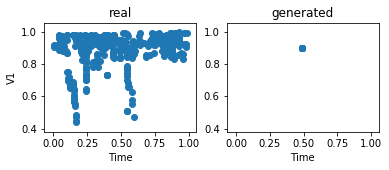

====> Epoch: 700 Average loss: 18.4127
====> Epoch: 701 Average loss: 18.4168
====> Epoch: 702 Average loss: 18.4228
====> Epoch: 703 Average loss: 18.4290
====> Epoch: 704 Average loss: 18.4351
====> Epoch: 705 Average loss: 18.4404
====> Epoch: 706 Average loss: 18.4446
====> Epoch: 707 Average loss: 18.4475
====> Epoch: 708 Average loss: 18.4487
====> Epoch: 709 Average loss: 18.4485
394 394
epoch: 710, Accuracy: 1.0


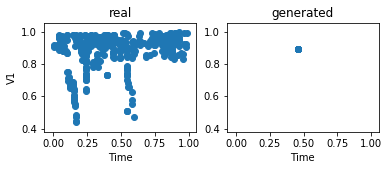

====> Epoch: 710 Average loss: 18.4471
====> Epoch: 711 Average loss: 18.4450
====> Epoch: 712 Average loss: 18.4431
====> Epoch: 713 Average loss: 18.4421
====> Epoch: 714 Average loss: 18.4427
====> Epoch: 715 Average loss: 18.4455
====> Epoch: 716 Average loss: 18.4507
====> Epoch: 717 Average loss: 18.4583
====> Epoch: 718 Average loss: 18.4677
====> Epoch: 719 Average loss: 18.4784
394 394
epoch: 720, Accuracy: 1.0


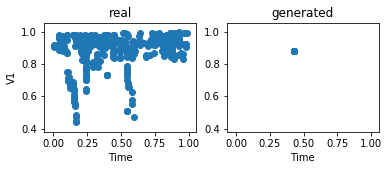

====> Epoch: 720 Average loss: 18.4891
====> Epoch: 721 Average loss: 18.4985
====> Epoch: 722 Average loss: 18.5055
====> Epoch: 723 Average loss: 18.5086
====> Epoch: 724 Average loss: 18.5073
====> Epoch: 725 Average loss: 18.5014
====> Epoch: 726 Average loss: 18.4918
====> Epoch: 727 Average loss: 18.4811
====> Epoch: 728 Average loss: 18.4680
====> Epoch: 729 Average loss: 18.4576
394 394
epoch: 730, Accuracy: 0.9974619289340102


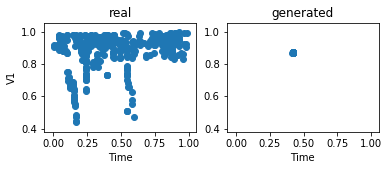

====> Epoch: 730 Average loss: 18.4504
====> Epoch: 731 Average loss: 18.4752
====> Epoch: 732 Average loss: 18.4480
====> Epoch: 733 Average loss: 18.4531
====> Epoch: 734 Average loss: 18.4615
====> Epoch: 735 Average loss: 18.4724
====> Epoch: 736 Average loss: 18.4846
====> Epoch: 737 Average loss: 18.4967
====> Epoch: 738 Average loss: 18.5074
====> Epoch: 739 Average loss: 18.5152
394 394
epoch: 740, Accuracy: 0.649746192893401


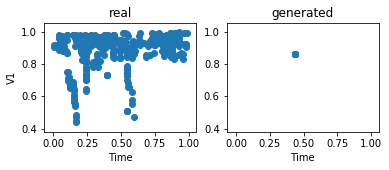

====> Epoch: 740 Average loss: 18.5188
====> Epoch: 741 Average loss: 18.5175
====> Epoch: 742 Average loss: 18.5109
====> Epoch: 743 Average loss: 18.4994
====> Epoch: 744 Average loss: 18.5980
====> Epoch: 745 Average loss: 18.4699
====> Epoch: 746 Average loss: 18.4562
====> Epoch: 747 Average loss: 18.4443
====> Epoch: 748 Average loss: 18.4354
====> Epoch: 749 Average loss: 18.4309
394 394
epoch: 750, Accuracy: 1.0


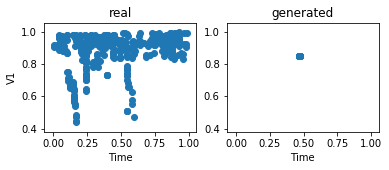

====> Epoch: 750 Average loss: 18.4316
====> Epoch: 751 Average loss: 18.4379
====> Epoch: 752 Average loss: 18.4495
====> Epoch: 753 Average loss: 18.4656
====> Epoch: 754 Average loss: 18.4846
====> Epoch: 755 Average loss: 18.5046
====> Epoch: 756 Average loss: 18.5231
====> Epoch: 757 Average loss: 18.5377
====> Epoch: 758 Average loss: 18.5460
====> Epoch: 759 Average loss: 18.5464
394 394
epoch: 760, Accuracy: 1.0


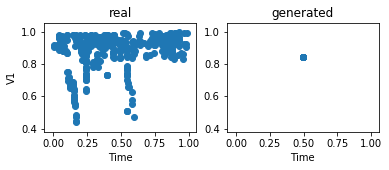

====> Epoch: 760 Average loss: 18.5384
====> Epoch: 761 Average loss: 18.5232
====> Epoch: 762 Average loss: 18.5029
====> Epoch: 763 Average loss: 18.5162
====> Epoch: 764 Average loss: 18.4594
====> Epoch: 765 Average loss: 18.4430
====> Epoch: 766 Average loss: 18.4337
====> Epoch: 767 Average loss: 18.4325
====> Epoch: 768 Average loss: 18.4391
====> Epoch: 769 Average loss: 18.4527
394 394
epoch: 770, Accuracy: 1.0


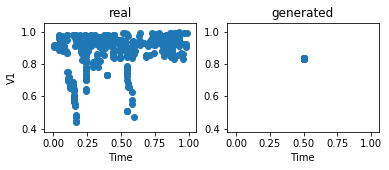

====> Epoch: 770 Average loss: 18.4721
====> Epoch: 771 Average loss: 18.4956
====> Epoch: 772 Average loss: 18.5216
====> Epoch: 773 Average loss: 18.5480
====> Epoch: 774 Average loss: 18.5731
====> Epoch: 775 Average loss: 18.5947
====> Epoch: 776 Average loss: 18.6112
====> Epoch: 777 Average loss: 18.6211
====> Epoch: 778 Average loss: 18.6233
====> Epoch: 779 Average loss: 18.6174
394 394
epoch: 780, Accuracy: 1.0


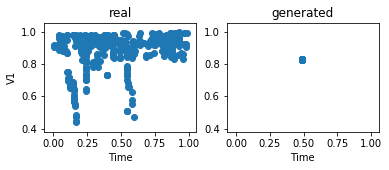

====> Epoch: 780 Average loss: 18.6038
====> Epoch: 781 Average loss: 18.5839
====> Epoch: 782 Average loss: 18.5597
====> Epoch: 783 Average loss: 18.5339
====> Epoch: 784 Average loss: 18.5092
====> Epoch: 785 Average loss: 18.4883
====> Epoch: 786 Average loss: 18.4731
====> Epoch: 787 Average loss: 18.4654
====> Epoch: 788 Average loss: 18.4659
====> Epoch: 789 Average loss: 18.4749
394 394
epoch: 790, Accuracy: 1.0


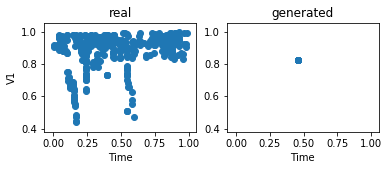

====> Epoch: 790 Average loss: 18.4923
====> Epoch: 791 Average loss: 18.5170
====> Epoch: 792 Average loss: 18.5479
====> Epoch: 793 Average loss: 18.5832
====> Epoch: 794 Average loss: 18.6206
====> Epoch: 795 Average loss: 18.6577
====> Epoch: 796 Average loss: 18.6918
====> Epoch: 797 Average loss: 18.7200
====> Epoch: 798 Average loss: 18.7398
====> Epoch: 799 Average loss: 18.7492
394 394
epoch: 800, Accuracy: 1.0


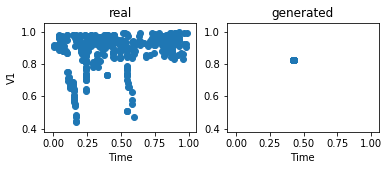

====> Epoch: 800 Average loss: 18.7468
====> Epoch: 801 Average loss: 18.7326
====> Epoch: 802 Average loss: 18.7076
====> Epoch: 803 Average loss: 18.6741
====> Epoch: 804 Average loss: 18.6354
====> Epoch: 805 Average loss: 18.5948
====> Epoch: 806 Average loss: 18.5560
====> Epoch: 807 Average loss: 18.5218
====> Epoch: 808 Average loss: 18.4943
====> Epoch: 809 Average loss: 18.4748
394 394
epoch: 810, Accuracy: 0.9949238578680203


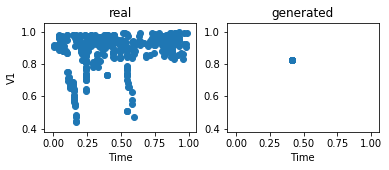

====> Epoch: 810 Average loss: 18.4640
====> Epoch: 811 Average loss: 18.4617
====> Epoch: 812 Average loss: 18.4674
====> Epoch: 813 Average loss: 18.4802
====> Epoch: 814 Average loss: 18.4989
====> Epoch: 815 Average loss: 18.5224
====> Epoch: 816 Average loss: 18.5492
====> Epoch: 817 Average loss: 18.5780
====> Epoch: 818 Average loss: 18.6074
====> Epoch: 819 Average loss: 18.6360
394 394
epoch: 820, Accuracy: 0.9949238578680203


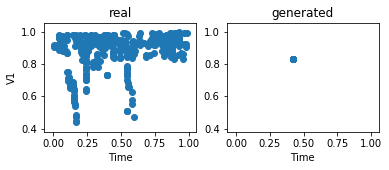

====> Epoch: 820 Average loss: 18.6625
====> Epoch: 821 Average loss: 18.6858
====> Epoch: 822 Average loss: 18.7049
====> Epoch: 823 Average loss: 18.7187
====> Epoch: 824 Average loss: 18.7266
====> Epoch: 825 Average loss: 18.7282
====> Epoch: 826 Average loss: 18.7232
====> Epoch: 827 Average loss: 18.7119
====> Epoch: 828 Average loss: 18.6947
====> Epoch: 829 Average loss: 18.6724
394 394
epoch: 830, Accuracy: 0.9949238578680203


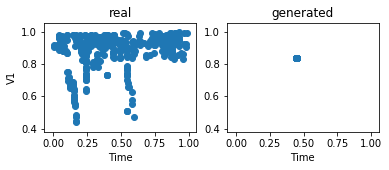

====> Epoch: 830 Average loss: 18.6460
====> Epoch: 831 Average loss: 18.6168
====> Epoch: 832 Average loss: 18.5862
====> Epoch: 833 Average loss: 18.5557
====> Epoch: 834 Average loss: 18.5267
====> Epoch: 835 Average loss: 18.5005
====> Epoch: 836 Average loss: 18.4783
====> Epoch: 837 Average loss: 18.4609
====> Epoch: 838 Average loss: 18.4490
====> Epoch: 839 Average loss: 18.4430
394 394
epoch: 840, Accuracy: 0.9949238578680203


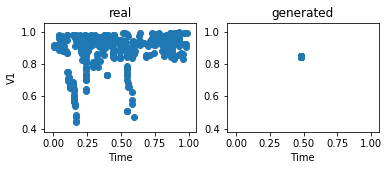

====> Epoch: 840 Average loss: 18.4432
====> Epoch: 841 Average loss: 18.4494
====> Epoch: 842 Average loss: 18.4614
====> Epoch: 843 Average loss: 18.4788
====> Epoch: 844 Average loss: 18.5008
====> Epoch: 845 Average loss: 18.5267
====> Epoch: 846 Average loss: 18.5555
====> Epoch: 847 Average loss: 18.5862
====> Epoch: 848 Average loss: 18.6175
====> Epoch: 849 Average loss: 18.6482
394 394
epoch: 850, Accuracy: 1.0


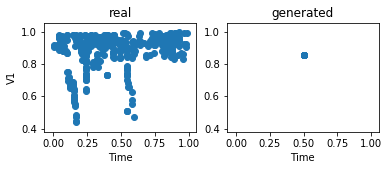

====> Epoch: 850 Average loss: 18.6771
====> Epoch: 851 Average loss: 18.7029
====> Epoch: 852 Average loss: 18.7247
====> Epoch: 853 Average loss: 18.7415
====> Epoch: 854 Average loss: 18.7527
====> Epoch: 855 Average loss: 18.7578
====> Epoch: 856 Average loss: 18.7566
====> Epoch: 857 Average loss: 18.7494
====> Epoch: 858 Average loss: 18.7367
====> Epoch: 859 Average loss: 18.7190
394 394
epoch: 860, Accuracy: 1.0


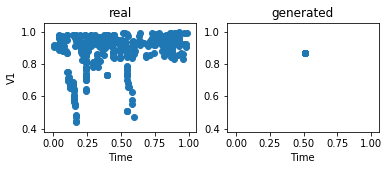

====> Epoch: 860 Average loss: 18.6972
====> Epoch: 861 Average loss: 18.6724
====> Epoch: 862 Average loss: 18.6454
====> Epoch: 863 Average loss: 18.6175
====> Epoch: 864 Average loss: 18.5894
====> Epoch: 865 Average loss: 18.5623
====> Epoch: 866 Average loss: 18.5367
====> Epoch: 867 Average loss: 18.5133
====> Epoch: 868 Average loss: 18.4927
====> Epoch: 869 Average loss: 18.4752
394 394
epoch: 870, Accuracy: 1.0


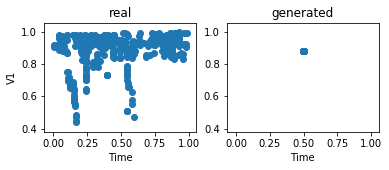

====> Epoch: 870 Average loss: 18.4610
====> Epoch: 871 Average loss: 18.4501
====> Epoch: 872 Average loss: 18.4427
====> Epoch: 873 Average loss: 18.4386
====> Epoch: 874 Average loss: 18.4376
====> Epoch: 875 Average loss: 18.4396
====> Epoch: 876 Average loss: 18.4444
====> Epoch: 877 Average loss: 18.4516
====> Epoch: 878 Average loss: 18.4609
====> Epoch: 879 Average loss: 18.4721
394 394
epoch: 880, Accuracy: 1.0


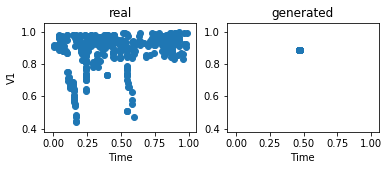

====> Epoch: 880 Average loss: 18.4849
====> Epoch: 881 Average loss: 18.4989
====> Epoch: 882 Average loss: 18.5139
====> Epoch: 883 Average loss: 18.5295
====> Epoch: 884 Average loss: 18.5454
====> Epoch: 885 Average loss: 18.5616
====> Epoch: 886 Average loss: 18.5775
====> Epoch: 887 Average loss: 18.5930
====> Epoch: 888 Average loss: 18.6078
====> Epoch: 889 Average loss: 18.6219
394 394
epoch: 890, Accuracy: 1.0


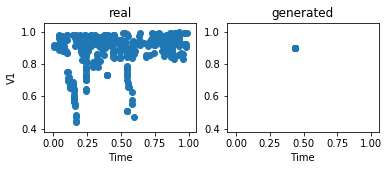

====> Epoch: 890 Average loss: 18.6343
====> Epoch: 891 Average loss: 18.6390
====> Epoch: 892 Average loss: 18.6417
====> Epoch: 893 Average loss: 18.6435
====> Epoch: 894 Average loss: 18.6446
====> Epoch: 895 Average loss: 18.6449
====> Epoch: 896 Average loss: 18.6445
====> Epoch: 897 Average loss: 18.6434
====> Epoch: 898 Average loss: 18.6415
====> Epoch: 899 Average loss: 18.6389
394 394
epoch: 900, Accuracy: 1.0


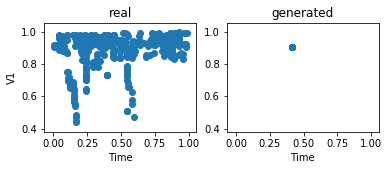

====> Epoch: 900 Average loss: 18.6357
====> Epoch: 901 Average loss: 18.6318
====> Epoch: 902 Average loss: 18.6274
====> Epoch: 903 Average loss: 18.6225
====> Epoch: 904 Average loss: 18.6172
====> Epoch: 905 Average loss: 18.6115
====> Epoch: 906 Average loss: 18.6052
====> Epoch: 907 Average loss: 18.5909
====> Epoch: 908 Average loss: 18.5806
====> Epoch: 909 Average loss: 18.5913
394 394
epoch: 910, Accuracy: 1.0


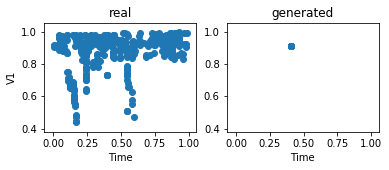

====> Epoch: 910 Average loss: 18.5653
====> Epoch: 911 Average loss: 18.5719
====> Epoch: 912 Average loss: 18.5666
====> Epoch: 913 Average loss: 18.5602
====> Epoch: 914 Average loss: 18.5538
====> Epoch: 915 Average loss: 18.5475
====> Epoch: 916 Average loss: 18.5414
====> Epoch: 917 Average loss: 18.5401
====> Epoch: 918 Average loss: 18.5297
====> Epoch: 919 Average loss: 18.5242
394 394
epoch: 920, Accuracy: 1.0


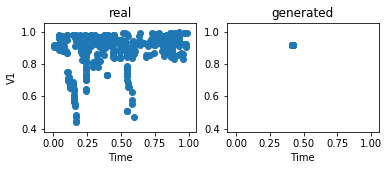

====> Epoch: 920 Average loss: 18.5191
====> Epoch: 921 Average loss: 18.7853
====> Epoch: 922 Average loss: 18.5098
====> Epoch: 923 Average loss: 18.5084
====> Epoch: 924 Average loss: 18.5021
====> Epoch: 925 Average loss: 18.4992
====> Epoch: 926 Average loss: 18.4967
====> Epoch: 927 Average loss: 18.4947
====> Epoch: 928 Average loss: 18.4931
====> Epoch: 929 Average loss: 18.4919
394 394
epoch: 930, Accuracy: 1.0


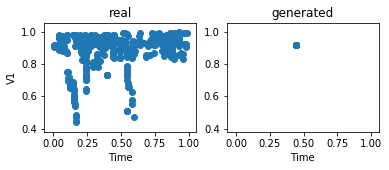

====> Epoch: 930 Average loss: 18.4911
====> Epoch: 931 Average loss: 18.4907
====> Epoch: 932 Average loss: 18.7732
====> Epoch: 933 Average loss: 18.4911
====> Epoch: 934 Average loss: 18.4918
====> Epoch: 935 Average loss: 18.4927
====> Epoch: 936 Average loss: 18.4939
====> Epoch: 937 Average loss: 18.4954
====> Epoch: 938 Average loss: 18.4971
====> Epoch: 939 Average loss: 18.4991
394 394
epoch: 940, Accuracy: 1.0


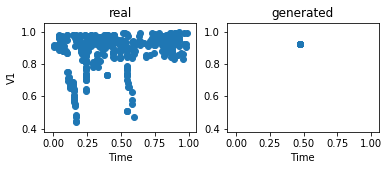

====> Epoch: 940 Average loss: 18.5013
====> Epoch: 941 Average loss: 18.5038
====> Epoch: 942 Average loss: 18.5063
====> Epoch: 943 Average loss: 18.5091
====> Epoch: 944 Average loss: 18.5119
====> Epoch: 945 Average loss: 18.5148
====> Epoch: 946 Average loss: 18.5178
====> Epoch: 947 Average loss: 18.5207
====> Epoch: 948 Average loss: 18.5237
====> Epoch: 949 Average loss: 18.5266
394 394
epoch: 950, Accuracy: 0.9949238578680203


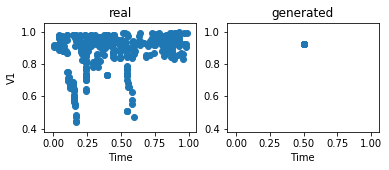

====> Epoch: 950 Average loss: 18.5295
====> Epoch: 951 Average loss: 18.5322
====> Epoch: 952 Average loss: 18.5347
====> Epoch: 953 Average loss: 18.5371
====> Epoch: 954 Average loss: 18.5393
====> Epoch: 955 Average loss: 18.5412
====> Epoch: 956 Average loss: 18.5429
====> Epoch: 957 Average loss: 18.5443
====> Epoch: 958 Average loss: 18.5454
====> Epoch: 959 Average loss: 18.5462
394 394
epoch: 960, Accuracy: 0.9949238578680203


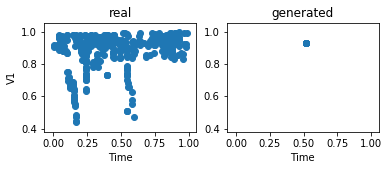

====> Epoch: 960 Average loss: 18.5467
====> Epoch: 961 Average loss: 18.5467
====> Epoch: 962 Average loss: 18.5465
====> Epoch: 963 Average loss: 18.5459


KeyboardInterrupt: 

In [17]:
losses = TESTVAE.trainVAE(dataloader, num_epochs=1000, data_dim = dataloader.dataset.features.size(1),feature_cols=feature_cols, embeddingDim=5, compressDims=(15, 15), decompressDims=(15, 15))

In [ ]:
# print(min(xgblosses))
plt.figure(figsize=(10,5))
plt.title(f"Vanilla GAN - Generator and Discriminator Loss During Training")
plt.plot(losses,label="G")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
# plt.savefig(f'reports/figures/gan/GAN.png')
plt.show()


In [ ]:
# losses = vae.trainVAE(dataloader, num_epochs=5, data_dim = dataloader.dataset.features.size(1),feature_cols=feature_cols)#, embeddingDim=128, compressDims=(128, 128), decompressDims=(128, 128))

In [ ]:
more_data = TESTVAE.generate(n=17500, num_epochs=2500, epoch=150,data_dim=30,embeddingDim=5, compressDims=(25, 15), batch_size=64)

In [ ]:
more_data = pd.DataFrame(more_data[:])

In [ ]:
b = np.ones((more_data.shape[0],more_data.shape[1]+1))
b[:,:-1] = more_data

In [ ]:
df_generatedData = pd.DataFrame(b, columns = feature_cols + label_col)
df_generatedData.head()

In [ ]:
train = train.append(df_generatedData)

In [ ]:
train_y = train.Class

In [ ]:
train_y.isnull().sum()

In [ ]:
train_X = train
train_X.drop('Class', axis=1, inplace=True)

# XGBoost

In [ ]:
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [ ]:
start_time = time.time()
dtrain = xgb.DMatrix(train_X, train_y, feature_names=feature_cols)
dtest = xgb.DMatrix(test_X, feature_names=feature_cols)

results_dict = {}

param = {
        'max_depth':5, 
        'eta':0.3, 
        'verbosity': 1, 
        'objective':'binary:logistic', 
        'eval_metric': 'auc', 
        'seed': 42
        }

model = xgb.train(param, dtrain, num_boost_round=100)
# make prediction
preds = np.round(model.predict(dtest))
elapsed_time = time.time() - start_time
print('Time elapsed to train: ', elapsed_time)

In [ ]:
preds = preds.round()

In [ ]:
500/64+1

In [ ]:
print('---' * 45)
print('XGBoost ROC/AUC: {:.6f}'.format(roc_auc_score(test_y, preds)))
print('Recall Score: {:.6f}'.format(recall_score(test_y, preds)))
print('Precision Score: {:.6f}'.format(precision_score(test_y, preds)))
print('F1 Score: {:.6f}'.format(f1_score(test_y, preds)))
print('Accuracy Score: {:.6f}'.format(accuracy_score(test_y, preds)))
print('---' * 45)